In [30]:
import cv2

a. Import required libraries (recommended- use tensorflow/keras library).

b. Import the dataset (use Google Drive if required).

c. Check the GPU available (recommended- use free GPU provided by Google Colab).

In [31]:
import tensorflow as tf
from keras.datasets import cifar10
tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8689146450273835666, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3235125106038593239
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2731817655516257313
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15695549568
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2396611880319411088
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [32]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

2. Data Visualization (0.25 mark)


      a. Plot at least one sample from each class of the dataset (use matplotlib/seaborn/any other library).


      b. Print the shapes of train and test data.

Training datadetails X=(50000, 32, 32, 3),Y=(50000, 1)
Test datadetails x=(10000, 32, 32, 3),y=(10000, 1)
Shape of each image in the training data:  (32, 32, 3)
--------------------------------------
Shape of each image in the test data:  (32, 32, 3)


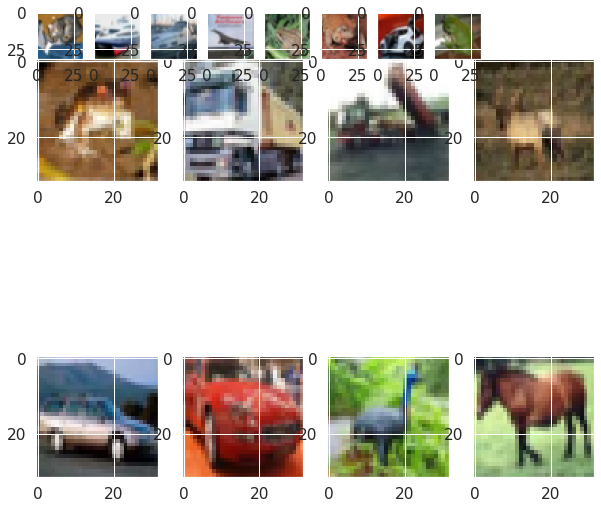

In [33]:
print('Training datadetails X=%s,Y=%s'%(x_train.shape,y_train.shape))
print('Test datadetails x=%s,y=%s'%(x_test.shape,y_test.shape))
import matplotlib.pyplot as plt
num_classes = 10
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
fig = plt.figure(figsize=(10, 10))

for i in range(1, 9):
    img = x_train[i-1]
    fig.add_subplot(2, 4, i)
    plt.imshow(img)

print("Shape of each image in the training data: ", x_train.shape[1:])

print("--------------------------------------")
for i in range(1, 9):
    img = x_test[i-1]
    fig.add_subplot(6, 10, i)
    plt.imshow(img)

print("Shape of each image in the test data: ", x_test.shape[1:])


3. Data Pre-processing (0.25 mark)

        a. Bring the train and test data in the required format.

4. Model Building (0.2*5 = 1 mark)

      a. Sequential Model layers- Use AT LEAST 3 dense layers with appropriate input for each. Choose the
best number for hidden units and give reasons.

      b. Add L2 regularization to all the layers.

      c. Add one layer of dropout at the appropriate position and give reasons.

      d. Choose the appropriate activation function for all the layers.

      e. Print the model summary

(50000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_47 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_49 (Dense)             (None, 10)                330       
Total params: 805,546
Trainable params: 805,546
Non-trainable params: 0
_________________________________________________________________


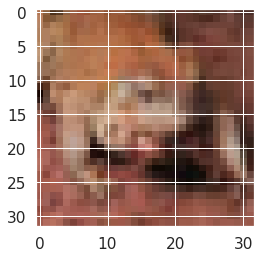

In [34]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

import tensorflow_datasets as tfds
import keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model
from keras.layers import Dense
from keras.regularizers import l2
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) =cifar10.load_data()
print(x_train.shape)
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.imshow(x_test[5])
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255
x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

y_train =tf.keras.utils.to_categorical(y_train)
y_test =tf.keras.utils.to_categorical(y_test)
dnnmodel = tf.keras.Sequential()
dnnmodel.add(layers.Dense(256,activation='relu',input_shape=(32*32*3,)))
dnnmodel.add(layers.Dense(64, activation ='relu'))
dnnmodel.add(layers.Dropout(0.0001))
dnnmodel.add(layers.Dense(32, kernel_regularizer=l2(0.001),activation ='relu', bias_regularizer=l2(0.001)))
dnnmodel.add(layers.Dense(10,activation ='relu')) 
dnnmodel.summary()


5. Model Compilation (0.25 mark)

      a. Compile the model with the appropriate loss function.

      b. Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
      
      c. Use accuracy as metric.

In [35]:
dnnmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


6. Model Training (0.5 + 0.5 = 1 mark)

    a. Train the model for an appropriate number of epochs (print the train and validation accuracy/loss for
each epoch). Use the appropriate batch size.

      b. Plot the loss and accuracy history graphs. Print the total time taken for training.

In [36]:
import time
start_time = time.time()
imageCasificationModelFit = dnnmodel.fit(x_train,y_train,validation_split=0.2, epochs=50,batch_size=128)
end_time =time.time()
total_time=end_time-start_time
print("Total Time taken for training data:",total_time)
testLoss,testAccuracy = dnnmodel.evaluate(x_test,y_test)
print('Testing Loss \t',testLoss)
print('Testing Accuracy',testAccuracy)

Epoch 1/50
313/313 [==============================] - 1s 4ms/step - loss: 3.6150 - accuracy: 0.1318 - val_loss: 3.4631 - val_accuracy: 0.1712
Epoch 2/50
313/313 [==============================] - 1s 4ms/step - loss: 2.6026 - accuracy: 0.1763 - val_loss: 2.1558 - val_accuracy: 0.2000
Epoch 3/50
313/313 [==============================] - 1s 4ms/step - loss: 2.1626 - accuracy: 0.1676 - val_loss: 2.1307 - val_accuracy: 0.1945
Epoch 4/50
313/313 [==============================] - 1s 4ms/step - loss: 2.1325 - accuracy: 0.1914 - val_loss: 2.1152 - val_accuracy: 0.2129
Epoch 5/50
313/313 [==============================] - 1s 4ms/step - loss: 2.1244 - accuracy: 0.2019 - val_loss: 2.1310 - val_accuracy: 0.2191
Epoch 6/50
313/313 [==============================] - 1s 4ms/step - loss: 2.1115 - accuracy: 0.2136 - val_loss: 2.1058 - val_accuracy: 0.2111
Epoch 7/50
313/313 [==============================] - 1s 4ms/step - loss: 2.1305 - accuracy: 0.2099 - val_loss: 2.3829 - val_accuracy: 0.1003
Epoch 

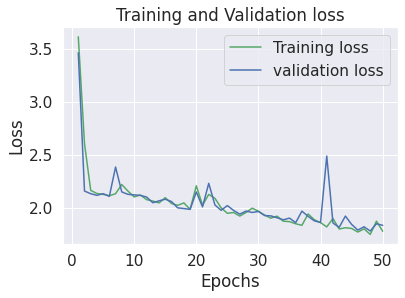

In [37]:
loss_train = imageCasificationModelFit.history['loss']
loss_val = imageCasificationModelFit.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

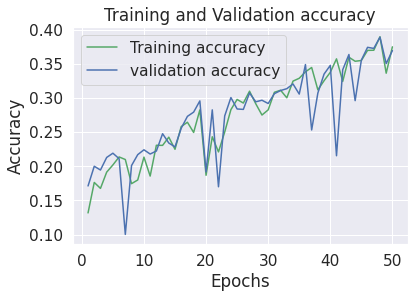

In [38]:
loss_train = imageCasificationModelFit.history['accuracy']
loss_val = imageCasificationModelFit.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

7. Model Evaluation (0.25 + 0.75 = 1 mark)
      a. Print the final test/validation loss and accuracy.
      b. Print confusion matrix and classification report for the validation dataset. Write a summary for the
best and worst performing class and the overall trend.

In [39]:
from sklearn.metrics import classification_report
def model_score(dnnmodel,x_test,y_test):  
  y_preds= dnnmodel.predict(x_test)
  y_hat=tf.argmax(y_preds,1)
  rounded_test_labels=tf.argmax(y_test,1)
  print("Confusion Matrix:\n {}".format(classification_report(rounded_test_labels,y_hat.numpy())))

model_score(dnnmodel,x_test,y_test)

Confusion Matrix:
               precision    recall  f1-score   support

           0       0.46      0.39      0.42      1000
           1       0.53      0.34      0.41      1000
           2       0.33      0.13      0.19      1000
           3       0.27      0.26      0.26      1000
           4       0.33      0.32      0.33      1000
           5       0.39      0.18      0.25      1000
           6       0.34      0.62      0.44      1000
           7       0.40      0.51      0.45      1000
           8       0.45      0.41      0.43      1000
           9       0.37      0.63      0.47      1000

    accuracy                           0.38     10000
   macro avg       0.39      0.38      0.36     10000
weighted avg       0.39      0.38      0.36     10000



Confusion Matrix

313/313 - 0s
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[393  27  37  55  40   3  50  83 177 135]
 [ 22 335   5  53  16   8  64  39  68 390]
 [109  16 134  90 182  41 248 108  42  30]
 [ 26  28  42 257  59 132 228 115  41  72]
 [ 55  13  63  71 320  23 255 145  26  29]
 [ 16  17  46 223  93 178 204 117  67  39]
 [ 11  19  33  58 123  36 622  58  11  29]
 [ 22  29  34  86 104  21  86 508  14  96]
 [170  60   7  40  16   5  30  30 411 231]
 [ 27  92   2  35   5   6  64  79  63 627]]


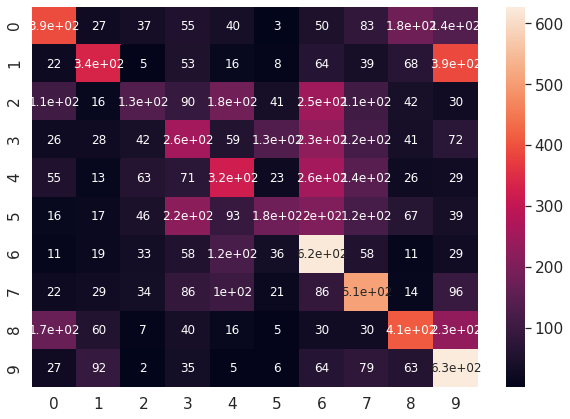

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = dnnmodel.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

Hyperparameter Tuning- Build two more models by changing the following hyperparameters one at a time (0.5 + 0.5
= 1 mark)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_51 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_52 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_53 (Dense)             (None, 10)                330       
Total params: 805,546
Trainable params: 805,546
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
313/313 [==============================] - 2s 5ms/step - loss: 2.3133 - accuracy: 0.1006 - val_loss: 2

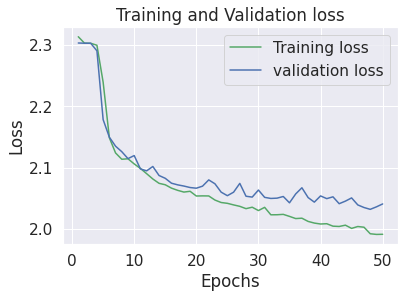

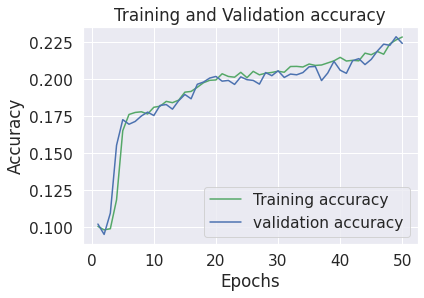

313/313 - 0s
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[275   0   0  52   0 112  61   0  49 451]
 [ 96   0   0  54   0  69  62   0 104 615]
 [104   0   0  76   0 291 430   0  29  70]
 [ 75   0   0  95   0 472 270   0  25  63]
 [ 67   0   0  48   0 181 617   0  24  63]
 [ 61   0   0  56   0 523 307   0  17  36]
 [ 33   0   0  39   0 261 620   0  17  30]
 [ 96   0   0  87   0 407 295   0  26  89]
 [145   0   0  50   0  88  22   0  63 632]
 [ 70   0   0  37   0  91  52   0  67 683]]


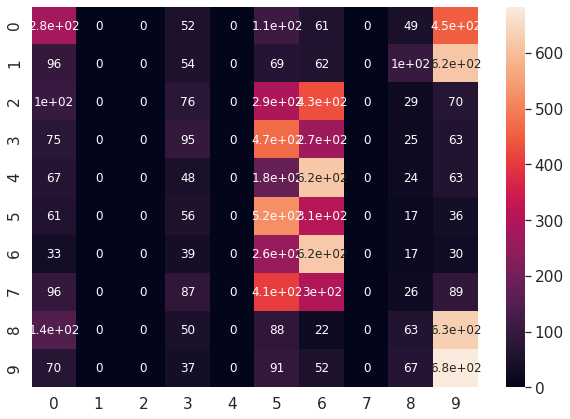

In [41]:
# SoftMax Fuction 

dnnmodel = tf.keras.Sequential()
dnnmodel.add(layers.Dense(256,activation='softmax',input_shape=(32*32*3,)))
dnnmodel.add(layers.Dense(64, activation ='softmax'))
dnnmodel.add(layers.Dropout(0.0001))
dnnmodel.add(layers.Dense(32, kernel_regularizer=l2(0.001),activation ='softmax', bias_regularizer=l2(0.001)))
dnnmodel.add(layers.Dense(10,activation ='softmax')) 
dnnmodel.summary()
dnnmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

import time
start_time = time.time()
imageCasificationModelFit = dnnmodel.fit(x_train,y_train,validation_split=0.2, epochs=50,batch_size=128)
end_time =time.time()
total_time=end_time-start_time
print("Total Time taken for training data:",total_time)
testLoss,testAccuracy = dnnmodel.evaluate(x_test,y_test)
print('Testing Loss \t',testLoss)
print('Testing Accuracy',testAccuracy)


loss_train = imageCasificationModelFit.history['loss']
loss_val = imageCasificationModelFit.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


loss_train = imageCasificationModelFit.history['accuracy']
loss_val = imageCasificationModelFit.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Y_pred = dnnmodel.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_55 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_57 (Dense)             (None, 10)                330       
Total params: 805,546
Trainable params: 805,546
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
313/313 [==============================] - 1s 4ms/step - loss: 7.9910 - accuracy: 0.1007 - val_loss: 8

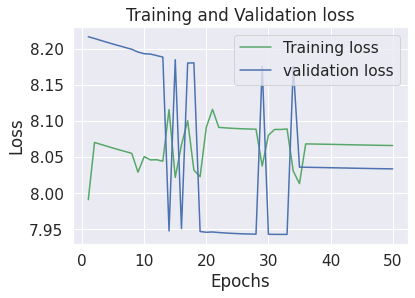

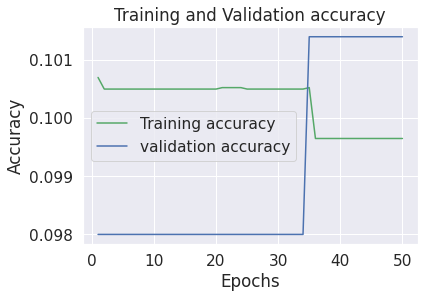

313/313 - 0s
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]]


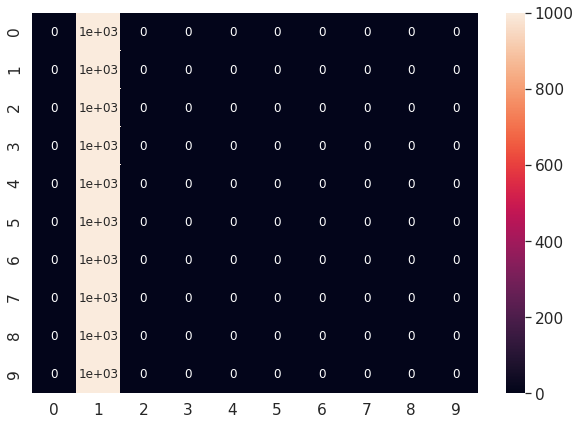

In [42]:
#Tanh Functions
dnnmodel = tf.keras.Sequential()
dnnmodel.add(layers.Dense(256,activation='tanh',input_shape=(32*32*3,)))
dnnmodel.add(layers.Dense(64, activation ='tanh'))
dnnmodel.add(layers.Dropout(0.0001))
dnnmodel.add(layers.Dense(32, kernel_regularizer=l2(0.001),activation ='tanh', bias_regularizer=l2(0.001)))
dnnmodel.add(layers.Dense(10,activation ='tanh')) 
dnnmodel.summary()
dnnmodel.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

import time
start_time = time.time()
imageCasificationModelFit = dnnmodel.fit(x_train,y_train,validation_split=0.2, epochs=50,batch_size=128)
end_time =time.time()
total_time=end_time-start_time
print("Total Time taken for training data:",total_time)
testLoss,testAccuracy = dnnmodel.evaluate(x_test,y_test)
print('Testing Loss \t',testLoss)
print('Testing Accuracy',testAccuracy)


loss_train = imageCasificationModelFit.history['loss']
loss_val = imageCasificationModelFit.history['val_loss']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


loss_train = imageCasificationModelFit.history['accuracy']
loss_val = imageCasificationModelFit.history['val_accuracy']
epochs = range(1,51)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Y_pred = dnnmodel.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()